In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import io
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the aesthetic style of the plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
# Create a sample dataset based on the provided data, but extended for better visualization
df = pd.read_excel("Book1.xlsx")
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
df.shape

(1048575, 9)

In [5]:
df_sample = df[:50000]
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
49995,2007-01-20,10:39:00,3.762,0.544,232.32,16.2,37.0,1.0,0.0
49996,2007-01-20,10:40:00,3.754,0.542,232.07,16.2,37.0,2.0,0.0
49997,2007-01-20,10:41:00,3.750,0.540,231.90,16.2,37.0,1.0,0.0
49998,2007-01-20,10:42:00,1.876,0.568,233.95,8.8,7.0,1.0,0.0


In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  datetime64[ns]
 1   Time                   50000 non-null  object        
 2   Global_active_power    49995 non-null  float64       
 3   Global_reactive_power  49995 non-null  float64       
 4   Voltage                49995 non-null  float64       
 5   Global_intensity       49995 non-null  float64       
 6   Sub_metering_1         49995 non-null  float64       
 7   Sub_metering_2         49995 non-null  float64       
 8   Sub_metering_3         49995 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.4+ MB


In [7]:
df_sample['Date'] = df_sample['Date'].astype('str')
df_sample['Time'] = df_sample['Time'].astype('str')

In [8]:
df_sample['Date']

0        2006-12-16
1        2006-12-16
2        2006-12-16
3        2006-12-16
4        2006-12-16
            ...    
49995    2007-01-20
49996    2007-01-20
49997    2007-01-20
49998    2007-01-20
49999    2007-01-20
Name: Date, Length: 50000, dtype: object

In [10]:
df_sample["Time"]

0        17:24:00
1        17:25:00
2        17:26:00
3        17:27:00
4        17:28:00
           ...   
49995    10:39:00
49996    10:40:00
49997    10:41:00
49998    10:42:00
49999    10:43:00
Name: Time, Length: 50000, dtype: object

In [12]:
df_sample['Timestamp'] = pd.to_datetime(df_sample['Date']+ ' ' + df_sample['Time'], format='%Y-%m-%d %H:%M:%S')
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
49995,2007-01-20,10:39:00,3.762,0.544,232.32,16.2,37.0,1.0,0.0,2007-01-20 10:39:00
49996,2007-01-20,10:40:00,3.754,0.542,232.07,16.2,37.0,2.0,0.0,2007-01-20 10:40:00
49997,2007-01-20,10:41:00,3.750,0.540,231.90,16.2,37.0,1.0,0.0,2007-01-20 10:41:00
49998,2007-01-20,10:42:00,1.876,0.568,233.95,8.8,7.0,1.0,0.0,2007-01-20 10:42:00


In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   50000 non-null  object        
 1   Time                   50000 non-null  object        
 2   Global_active_power    49995 non-null  float64       
 3   Global_reactive_power  49995 non-null  float64       
 4   Voltage                49995 non-null  float64       
 5   Global_intensity       49995 non-null  float64       
 6   Sub_metering_1         49995 non-null  float64       
 7   Sub_metering_2         49995 non-null  float64       
 8   Sub_metering_3         49995 non-null  float64       
 9   Timestamp              50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 3.8+ MB


In [15]:
df_sample["Date"] = pd.to_datetime(df_sample["Date"])

In [19]:
df_sample["Time"] = df_sample["Timestamp"].dt.time
df_sample["Time"]

0        17:24:00
1        17:25:00
2        17:26:00
3        17:27:00
4        17:28:00
           ...   
49995    10:39:00
49996    10:40:00
49997    10:41:00
49998    10:42:00
49999    10:43:00
Name: Time, Length: 50000, dtype: object

In [20]:
df_sample.describe()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp
count,50000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,49995.000000,50000
mean,2007-01-02 14:04:59.520000,1.678082,0.136452,241.032930,7.098210,1.124052,1.904450,7.205901,2007-01-03 02:03:30
min,2006-12-16 00:00:00,0.194000,0.000000,226.320000,0.800000,0.000000,0.000000,0.000000,2006-12-16 17:24:00
25%,2006-12-25 00:00:00,0.396000,0.000000,238.620000,1.800000,0.000000,0.000000,0.000000,2006-12-25 09:43:45
50%,2007-01-03 00:00:00,1.432000,0.126000,241.290000,6.000000,0.000000,0.000000,0.000000,2007-01-03 02:03:30
75%,2007-01-11 00:00:00,2.456000,0.202000,243.570000,10.200000,0.000000,1.000000,17.000000,2007-01-11 18:23:15
max,2007-01-20 00:00:00,9.272000,0.862000,251.700000,40.400000,77.000000,78.000000,20.000000,2007-01-20 10:43:00
std,NaN,1.348109,0.119243,3.576536,5.672843,6.242584,7.733001,8.617257,NaN


In [22]:
# Let's add the day of week and hour for analysis
df_sample['day_of_week'] = df_sample['Timestamp'].dt.day_name()
df_sample['hour'] = df_sample['Timestamp'].dt.hour

In [24]:
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Timestamp,day_of_week,hour
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,Saturday,17
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,Saturday,17
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,Saturday,17
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,Saturday,17
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,Saturday,17
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2007-01-20,10:39:00,3.762,0.544,232.32,16.2,37.0,1.0,0.0,2007-01-20 10:39:00,Saturday,10
49996,2007-01-20,10:40:00,3.754,0.542,232.07,16.2,37.0,2.0,0.0,2007-01-20 10:40:00,Saturday,10
49997,2007-01-20,10:41:00,3.750,0.540,231.90,16.2,37.0,1.0,0.0,2007-01-20 10:41:00,Saturday,10
49998,2007-01-20,10:42:00,1.876,0.568,233.95,8.8,7.0,1.0,0.0,2007-01-20 10:42:00,Saturday,10


In [27]:
df_sample['total_sub_metering'] = df_sample['Sub_metering_1'] + df_sample['Sub_metering_2'] + df_sample['Sub_metering_3']

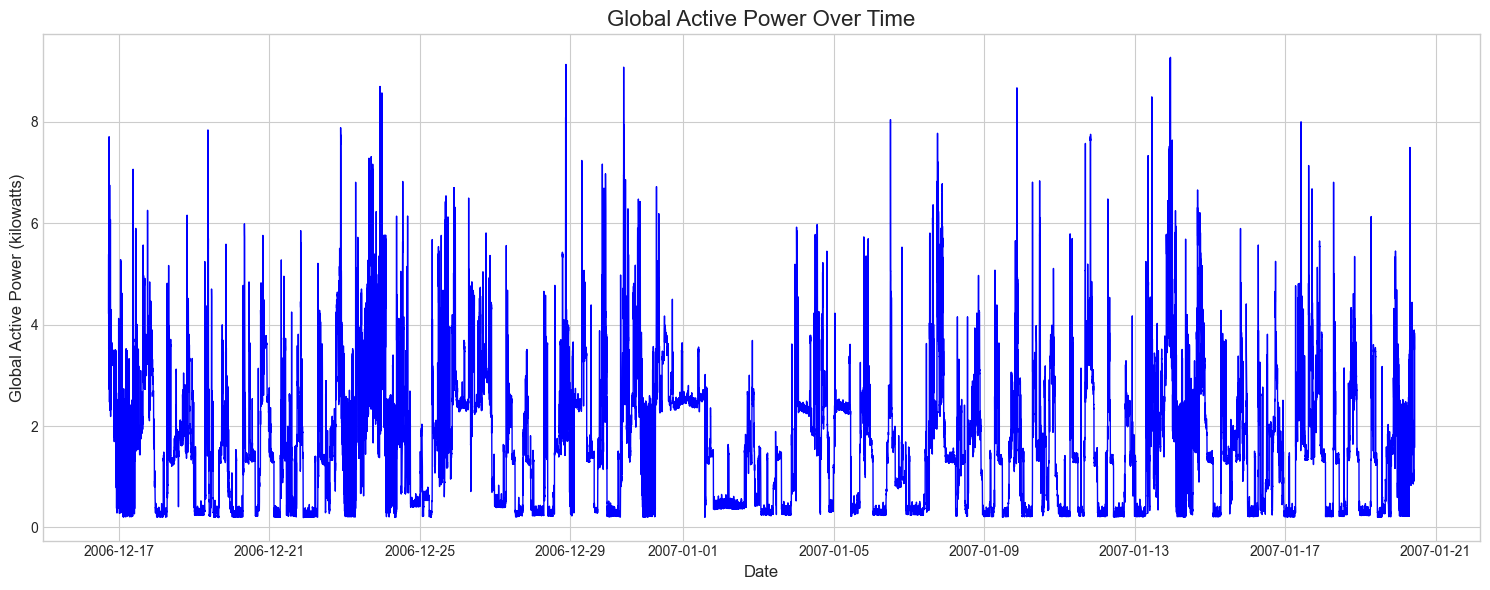

In [29]:
# 1. Line plot of Global_active_power over time
plt.figure(figsize=(15, 6))
plt.plot(df_sample['Timestamp'], df_sample['Global_active_power'], color='blue', linewidth=1)
plt.title('Global Active Power Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Global Active Power shows high volatility with regular spikes, typically ranging between 0-8 kilowatts, suggesting cyclical energy usage patterns throughout the monitored period.

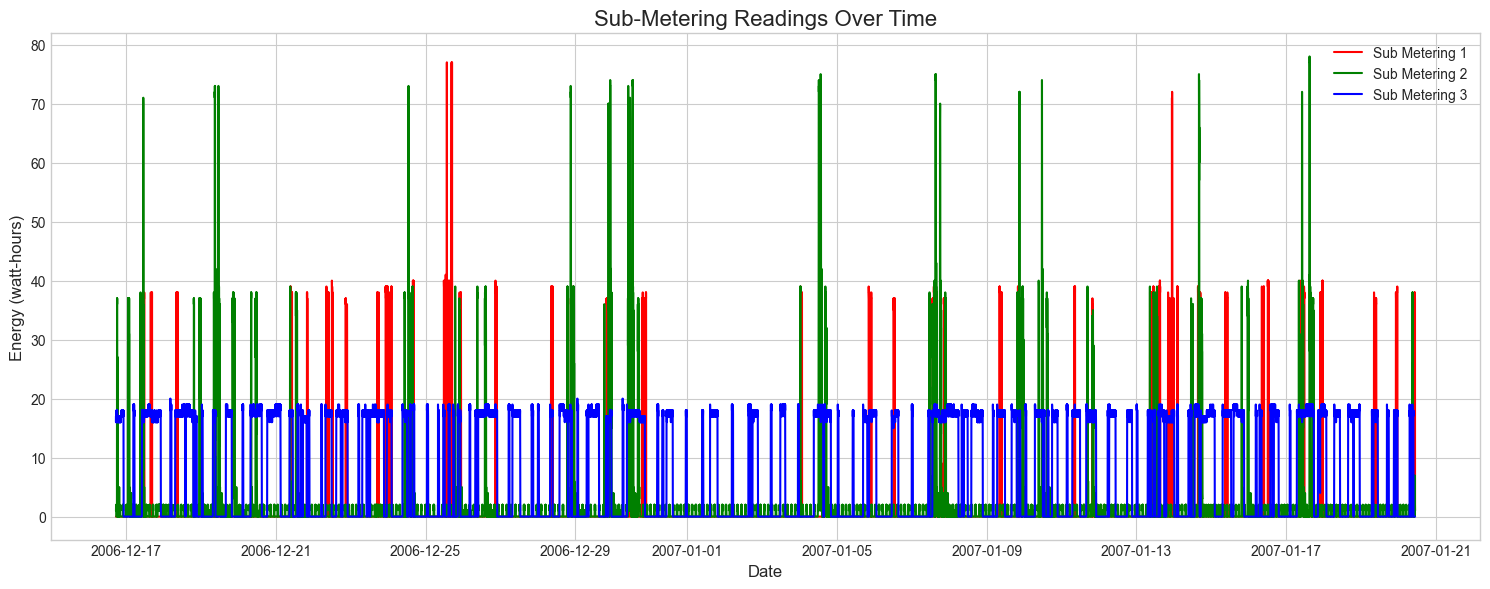

In [30]:
# 2. Multiple time series - Plot all three sub-metering values
plt.figure(figsize=(15, 6))
plt.plot(df_sample['Timestamp'], df_sample['Sub_metering_1'], label='Sub Metering 1', color='red')
plt.plot(df_sample['Timestamp'], df_sample['Sub_metering_2'], label='Sub Metering 2', color='green')
plt.plot(df_sample['Timestamp'], df_sample['Sub_metering_3'], label='Sub Metering 3', color='blue')
plt.title('Sub-Metering Readings Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy (watt-hours)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sub-metering readings reveal Sub-metering 3 (blue) maintains a consistent baseline around 18-20 watt-hours, while Sub-meterings 1 and 2 show intermittent activity with occasional high spikes reaching 70+ watt-hours.

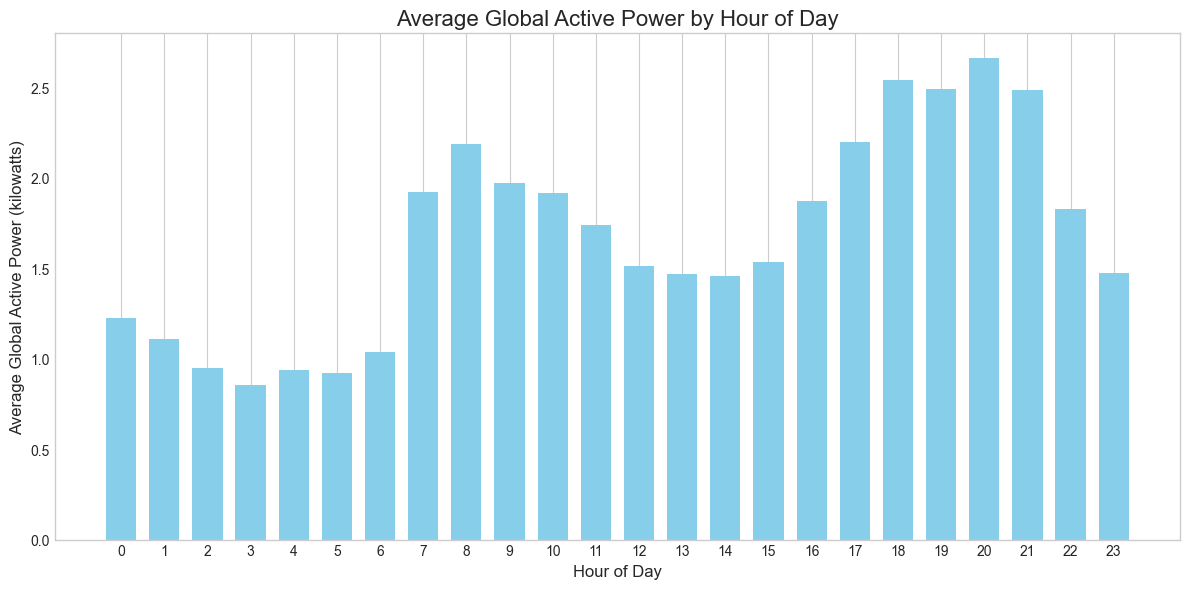

In [31]:
# 3. Daily/hourly average consumption
hourly_avg = df_sample.groupby('hour')['Global_active_power'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_avg['hour'], hourly_avg['Global_active_power'], color='skyblue', width=0.7)
plt.title('Average Global Active Power by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Global Active Power (kilowatts)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The hourly consumption pattern shows a clear bimodal distribution with peaks at 8-9 AM and 7-9 PM, with highest usage occurring during evening hours (peaking at 2.6+ kW around 8 PM).

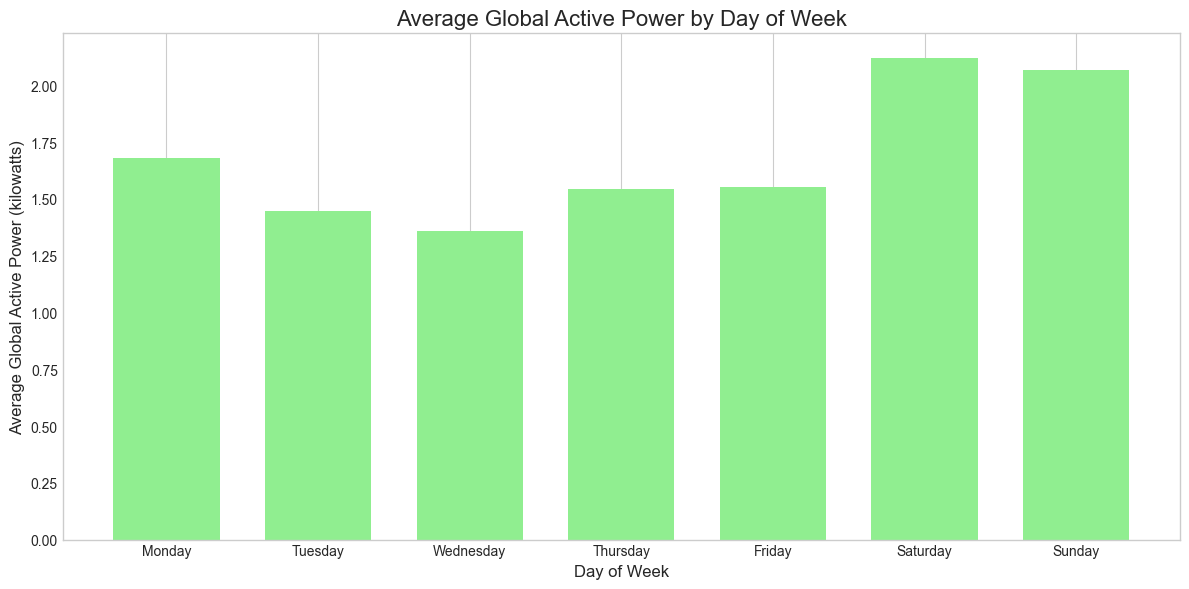

In [32]:
# Day of week average
dow_avg = df_sample.groupby('day_of_week')['Global_active_power'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(12, 6))
plt.bar(dow_avg.index, dow_avg.values, color='lightgreen', width=0.7)
plt.title('Average Global Active Power by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average Global Active Power (kilowatts)', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Weekend days (Saturday and Sunday) show significantly higher energy consumption (2+ kW) compared to weekdays, with Wednesday having the lowest average consumption (1.35 kW).

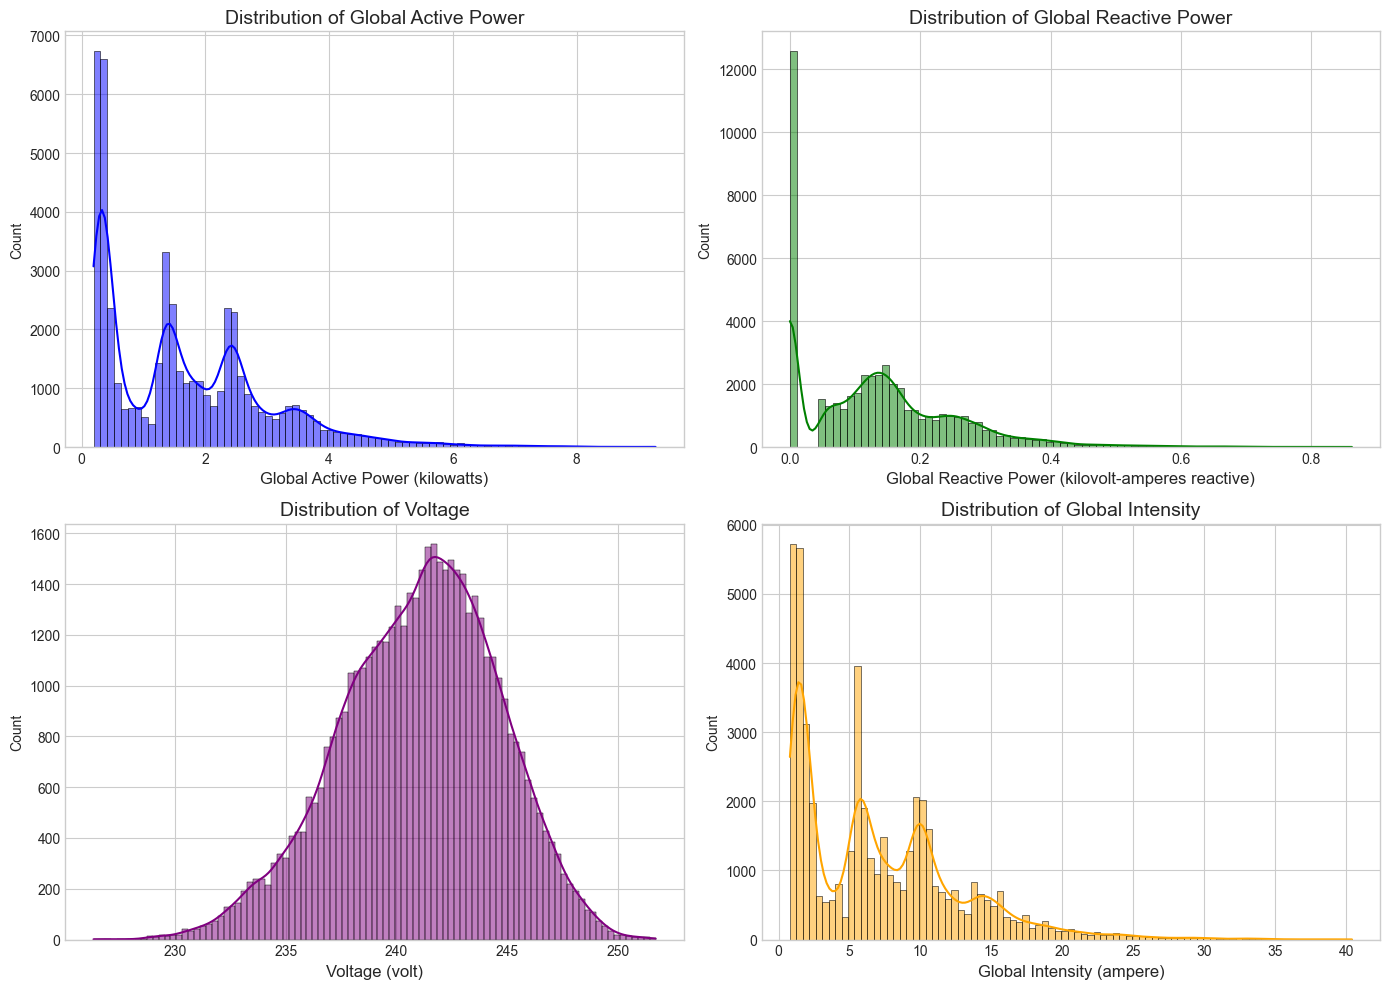

In [33]:
# 4. Histograms for each numerical variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df_sample['Global_active_power'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Global Active Power', fontsize=14)
axes[0, 0].set_xlabel('Global Active Power (kilowatts)', fontsize=12)

sns.histplot(df_sample['Global_reactive_power'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Global Reactive Power', fontsize=14)
axes[0, 1].set_xlabel('Global Reactive Power (kilovolt-amperes reactive)', fontsize=12)

sns.histplot(df_sample['Voltage'], kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Distribution of Voltage', fontsize=14)
axes[1, 0].set_xlabel('Voltage (volt)', fontsize=12)

sns.histplot(df_sample['Global_intensity'], kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Distribution of Global Intensity', fontsize=14)
axes[1, 1].set_xlabel('Global Intensity (ampere)', fontsize=12)

plt.tight_layout()
plt.show()

The histograms reveal multimodal distributions for Global Active and Reactive Power and Global Intensity, while Voltage follows a normal distribution centered around 240 volts.

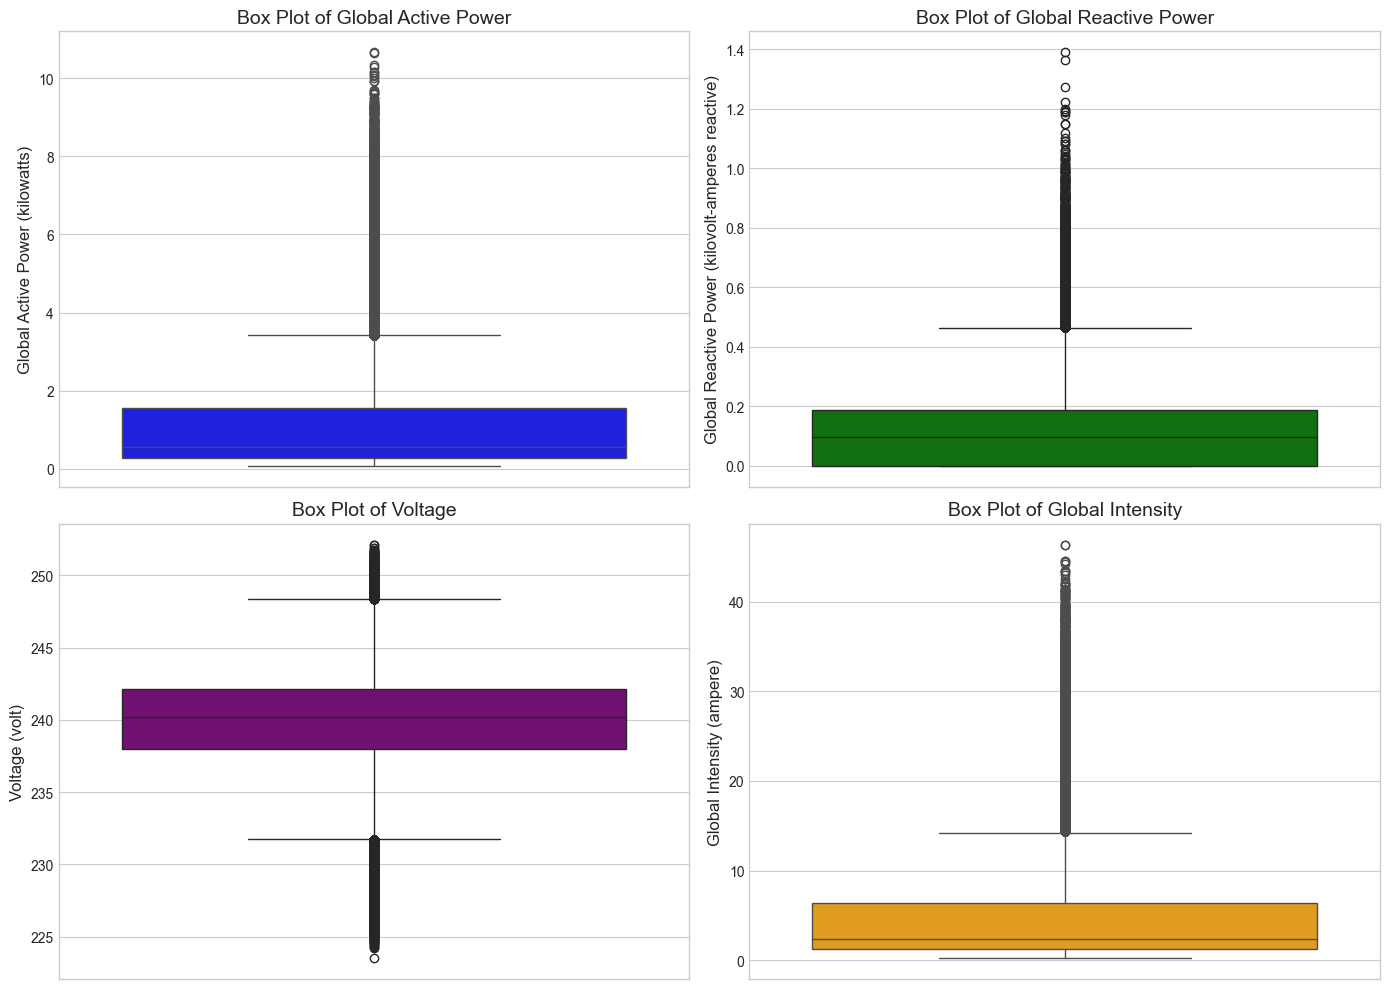

In [34]:
# 5. Box plots to identify outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(y=df['Global_active_power'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Box Plot of Global Active Power', fontsize=14)
axes[0, 0].set_ylabel('Global Active Power (kilowatts)', fontsize=12)

sns.boxplot(y=df['Global_reactive_power'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of Global Reactive Power', fontsize=14)
axes[0, 1].set_ylabel('Global Reactive Power (kilovolt-amperes reactive)', fontsize=12)

sns.boxplot(y=df['Voltage'], ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Box Plot of Voltage', fontsize=14)
axes[1, 0].set_ylabel('Voltage (volt)', fontsize=12)

sns.boxplot(y=df['Global_intensity'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot of Global Intensity', fontsize=14)
axes[1, 1].set_ylabel('Global Intensity (ampere)', fontsize=12)

plt.tight_layout()
plt.show()

Box plots highlight numerous outliers in all variables, especially in Global Active Power and Global Intensity, with voltage showing the most symmetric distribution.

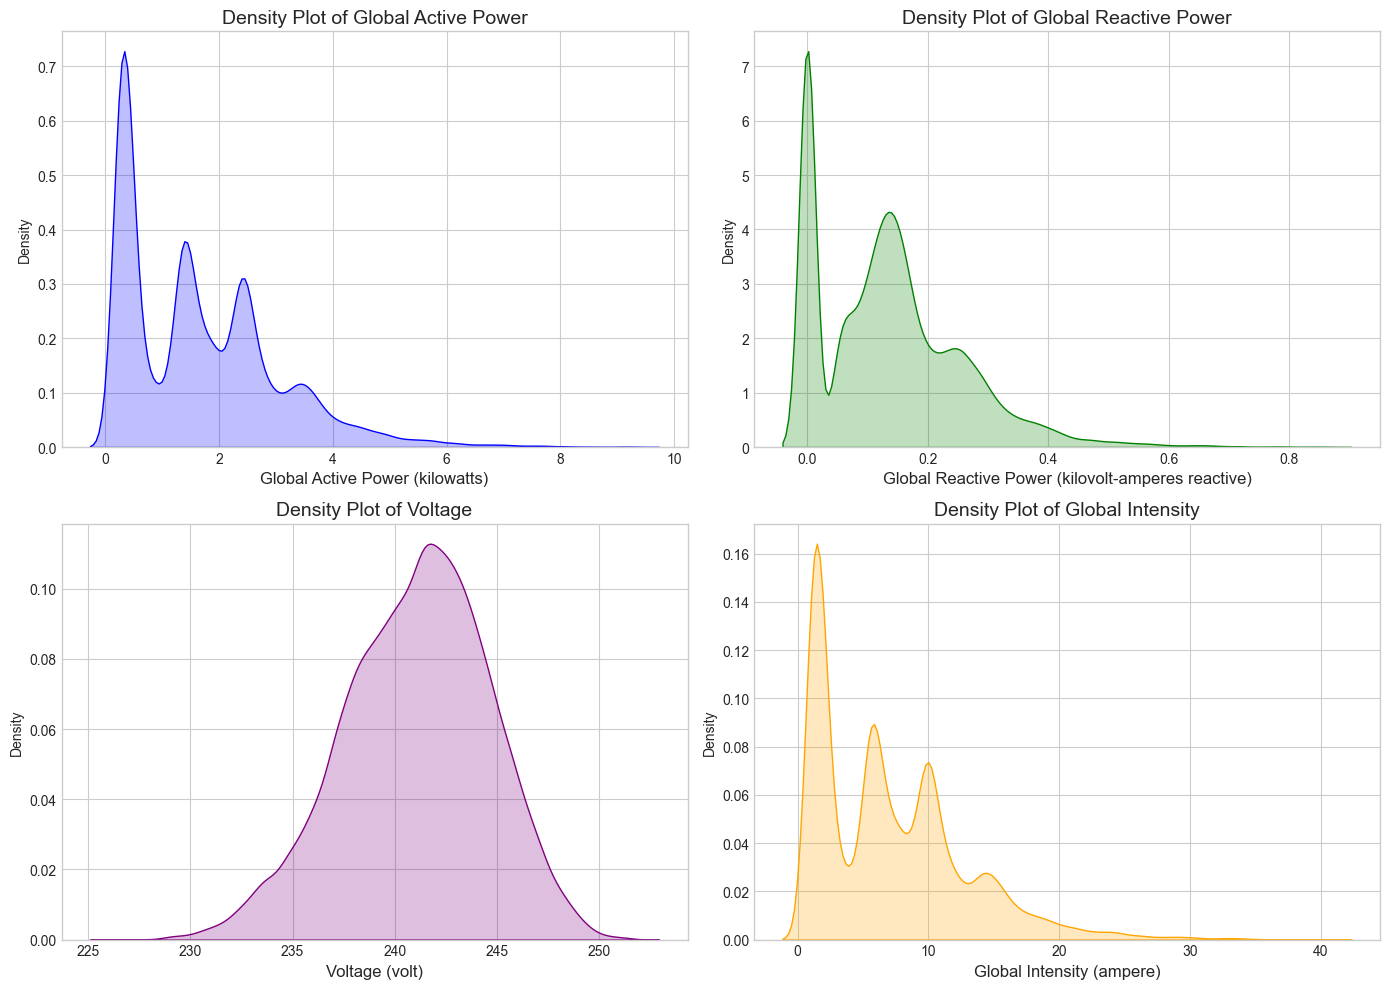

In [35]:
# 6. Density plots for continuous variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.kdeplot(df_sample['Global_active_power'], fill=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Density Plot of Global Active Power', fontsize=14)
axes[0, 0].set_xlabel('Global Active Power (kilowatts)', fontsize=12)

sns.kdeplot(df_sample['Global_reactive_power'], fill=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Density Plot of Global Reactive Power', fontsize=14)
axes[0, 1].set_xlabel('Global Reactive Power (kilovolt-amperes reactive)', fontsize=12)

sns.kdeplot(df_sample['Voltage'], fill=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Density Plot of Voltage', fontsize=14)
axes[1, 0].set_xlabel('Voltage (volt)', fontsize=12)

sns.kdeplot(df_sample['Global_intensity'], fill=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Density Plot of Global Intensity', fontsize=14)
axes[1, 1].set_xlabel('Global Intensity (ampere)', fontsize=12)

plt.tight_layout()
plt.show()

Density plots confirm the multimodal nature of power and intensity distributions, with several distinct peaks indicating different usage states or modes of operation.

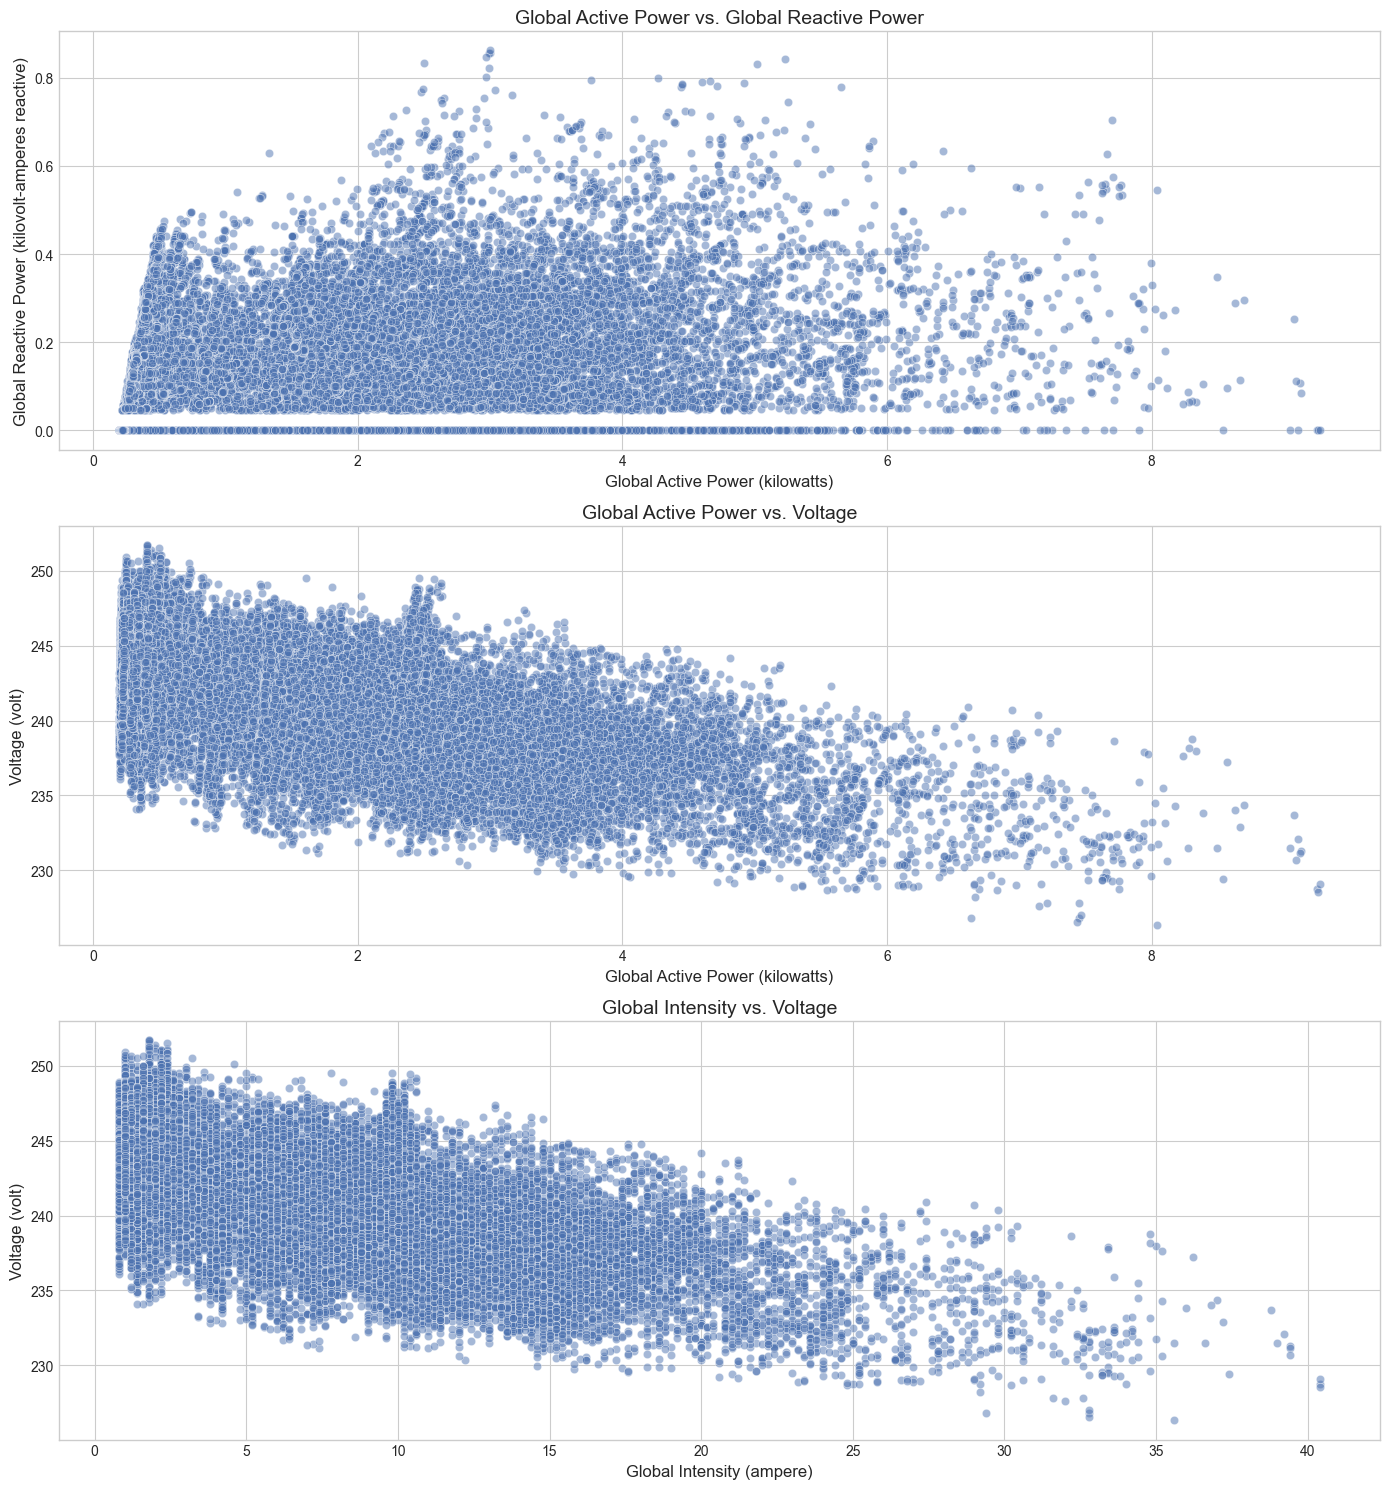

In [37]:
# 7. Scatter plots between variables
fig, axes = plt.subplots(3, 1, figsize=(14, 15))
sns.scatterplot(data=df_sample, x='Global_active_power', y='Global_reactive_power', alpha=0.5, ax=axes[0])
axes[0].set_title('Global Active Power vs. Global Reactive Power', fontsize=14)
axes[0].set_xlabel('Global Active Power (kilowatts)', fontsize=12)
axes[0].set_ylabel('Global Reactive Power (kilovolt-amperes reactive)', fontsize=12)

sns.scatterplot(data=df_sample, x='Global_active_power', y='Voltage', alpha=0.5, ax=axes[1])
axes[1].set_title('Global Active Power vs. Voltage', fontsize=14)
axes[1].set_xlabel('Global Active Power (kilowatts)', fontsize=12)
axes[1].set_ylabel('Voltage (volt)', fontsize=12)

sns.scatterplot(data=df_sample, x='Global_intensity', y='Voltage', alpha=0.5, ax=axes[2])
axes[2].set_title('Global Intensity vs. Voltage', fontsize=14)
axes[2].set_xlabel('Global Intensity (ampere)', fontsize=12)
axes[2].set_ylabel('Voltage (volt)', fontsize=12)

plt.tight_layout()
plt.show()

 Scatter plots show a negative correlation between power and voltage (higher power consumption correlates with lower voltage), and an inverse relationship between intensity and voltage.

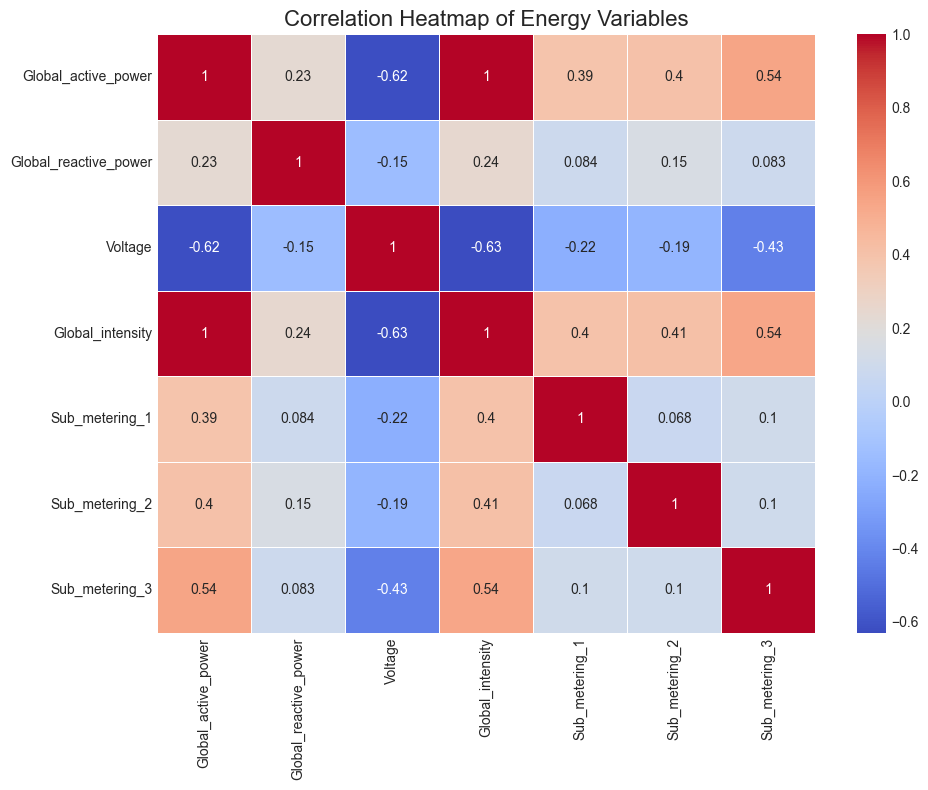

In [38]:
# 8. Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_sample[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 
                 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Energy Variables', fontsize=16)
plt.tight_layout()
plt.show()

The correlation heatmap confirms strong positive correlation (1.0) between Global Active Power and Global Intensity, moderate correlation (0.54) with Sub-metering 3, and significant negative correlation (-0.62) with Voltage.

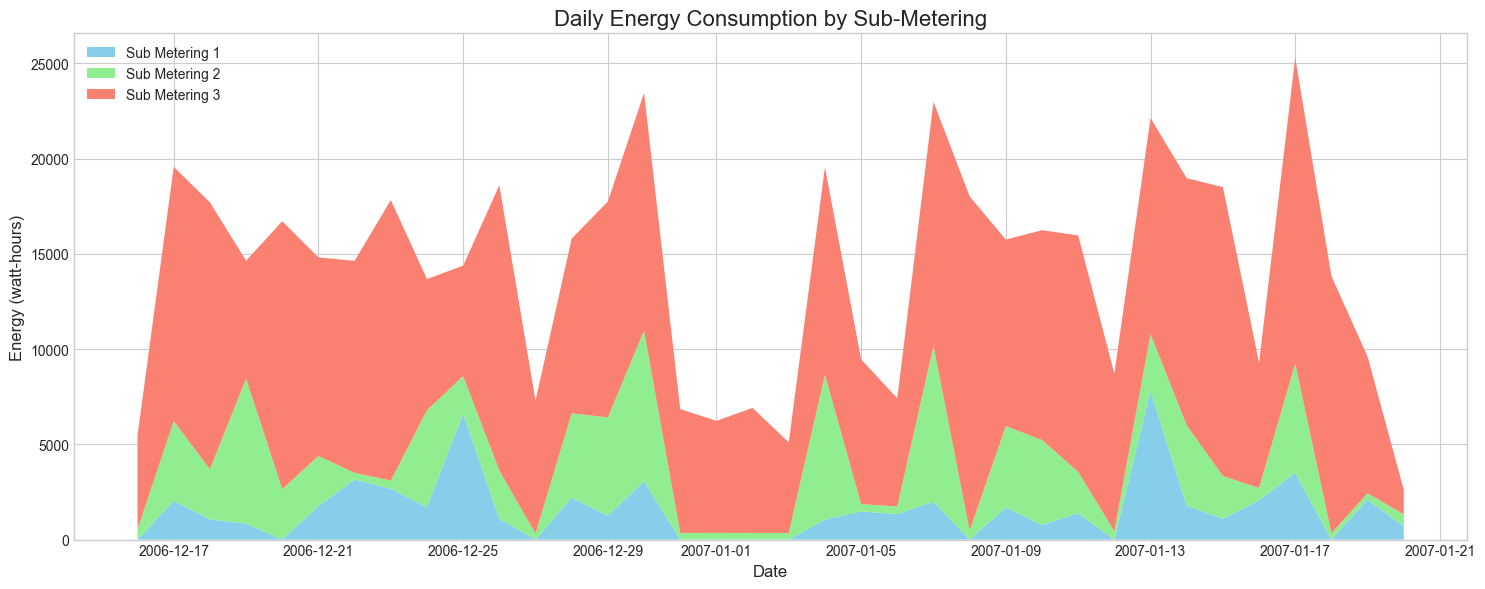

In [40]:
# 9. Stacked area chart
# Daily totals for stacked area chart
daily_data = df.groupby(df_sample['Timestamp'].dt.date).agg({
    'Sub_metering_1': 'sum',
    'Sub_metering_2': 'sum',
    'Sub_metering_3': 'sum'
}).reset_index()

plt.figure(figsize=(15, 6))
plt.stackplot(daily_data['Timestamp'], 
              daily_data['Sub_metering_1'], 
              daily_data['Sub_metering_2'], 
              daily_data['Sub_metering_3'],
              labels=['Sub Metering 1', 'Sub Metering 2', 'Sub Metering 3'],
              colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Daily Energy Consumption by Sub-Metering', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy (watt-hours)', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

The stacked area chart shows Sub-metering 3 (red) contributes the majority of energy consumption, with pronounced cyclical patterns and occasional significant increases across all sub-meters.

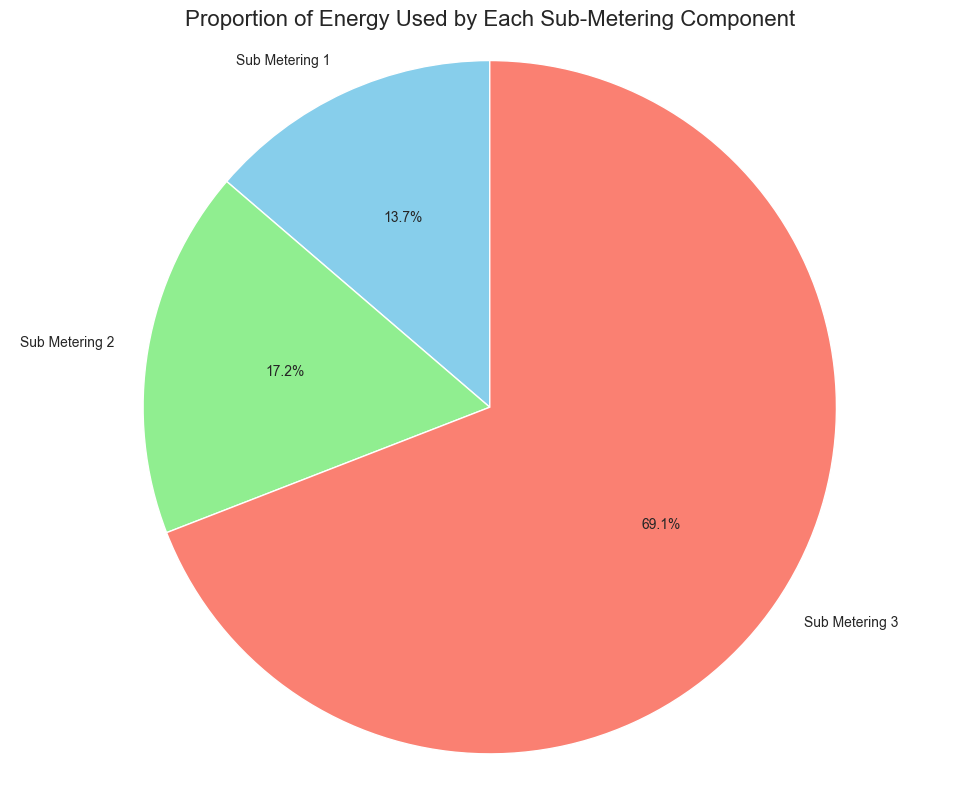

In [41]:
# 10. Pie chart
sub_meter_totals = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
plt.figure(figsize=(10, 8))
plt.pie(sub_meter_totals, labels=['Sub Metering 1', 'Sub Metering 2', 'Sub Metering 3'], 
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'],
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Proportion of Energy Used by Each Sub-Metering Component', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

The pie chart quantifies that Sub-metering 3 accounts for 69.1% of total energy consumption, while Sub-meterings 2 and 1 contribute 17.2% and 13.7% respectively.

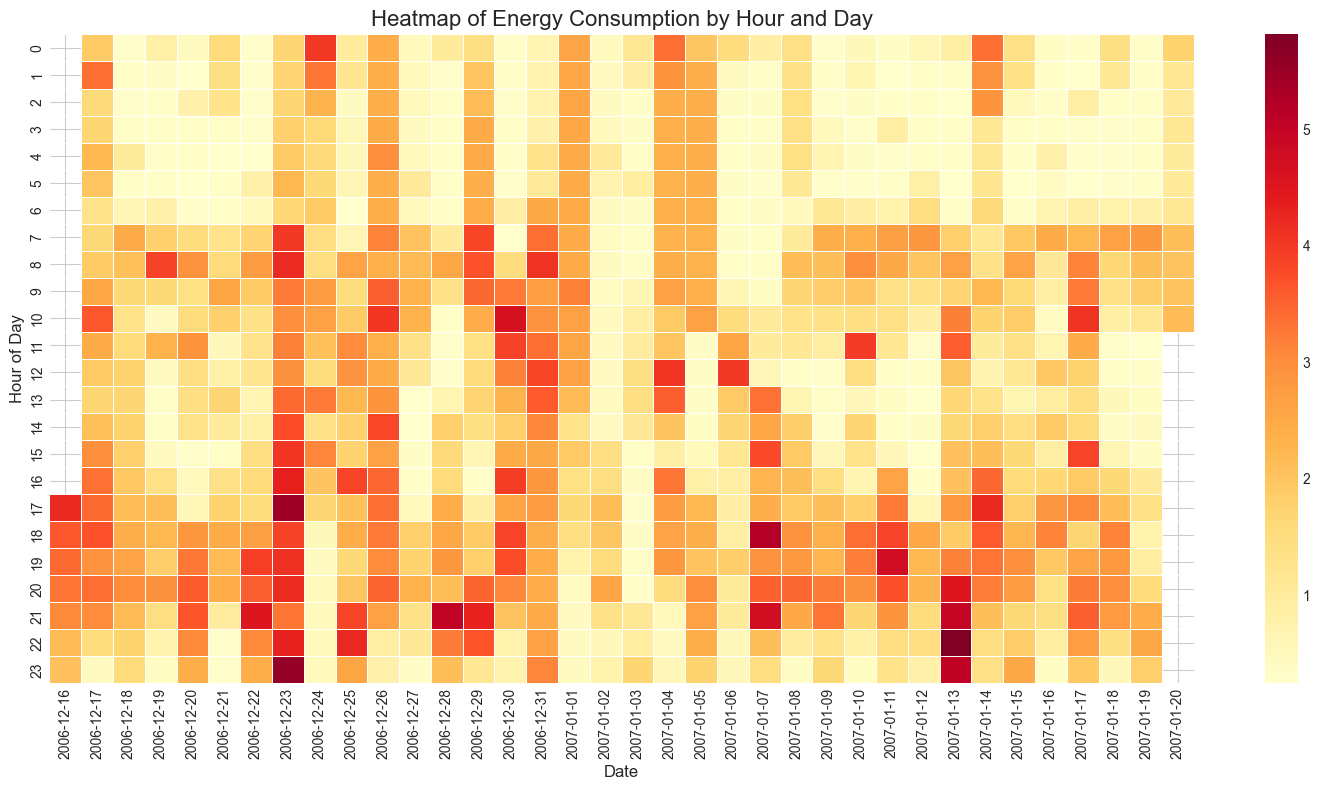

In [43]:
# 11. Heatmap of energy consumption by hour and day
# Create a pivot table for the heatmap
hourly_data = df_sample.copy()
hourly_data['date'] = hourly_data['Timestamp'].dt.date
hourly_data['hour'] = hourly_data['Timestamp'].dt.hour
pivot_data = hourly_data.pivot_table(values='Global_active_power', index='hour', columns='date', aggfunc='mean')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_data, cmap='YlOrRd', linewidths=0.5)
plt.title('Heatmap of Energy Consumption by Hour and Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.tight_layout()
plt.show()

The heatmap reveals higher energy consumption (darker colors) during evening hours (18-23), with distinctive day-to-day variations and some particularly high-usage periods shown in dark red.

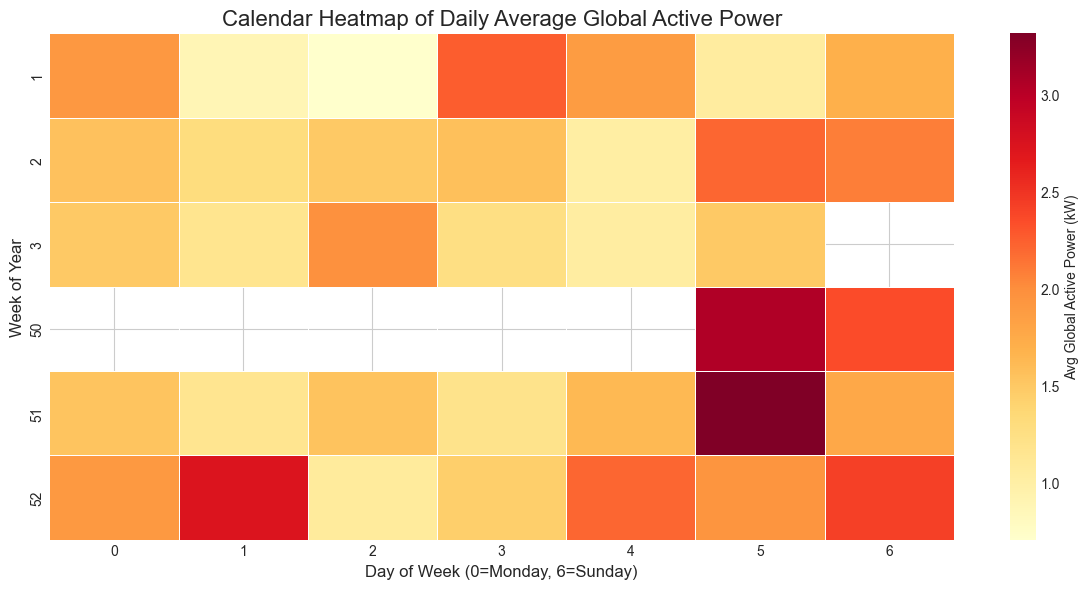

In [45]:
# 12. Calendar heatmap (simplified version)
# Group by day and calculate daily averages
daily_avg_power = df_sample.groupby(df_sample['Timestamp'].dt.date)['Global_active_power'].mean().reset_index()
daily_avg_power['day_of_week'] = pd.to_datetime(daily_avg_power['Timestamp']).dt.dayofweek
daily_avg_power['week'] = pd.to_datetime(daily_avg_power['Timestamp']).dt.isocalendar().week

# Create a pivot table
pivot_table = daily_avg_power.pivot_table(index='week', columns='day_of_week', values='Global_active_power')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=0.5, cbar_kws={'label': 'Avg Global Active Power (kW)'})
plt.title('Calendar Heatmap of Daily Average Global Active Power', fontsize=16)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Week of Year', fontsize=12)
plt.tight_layout()
plt.show()

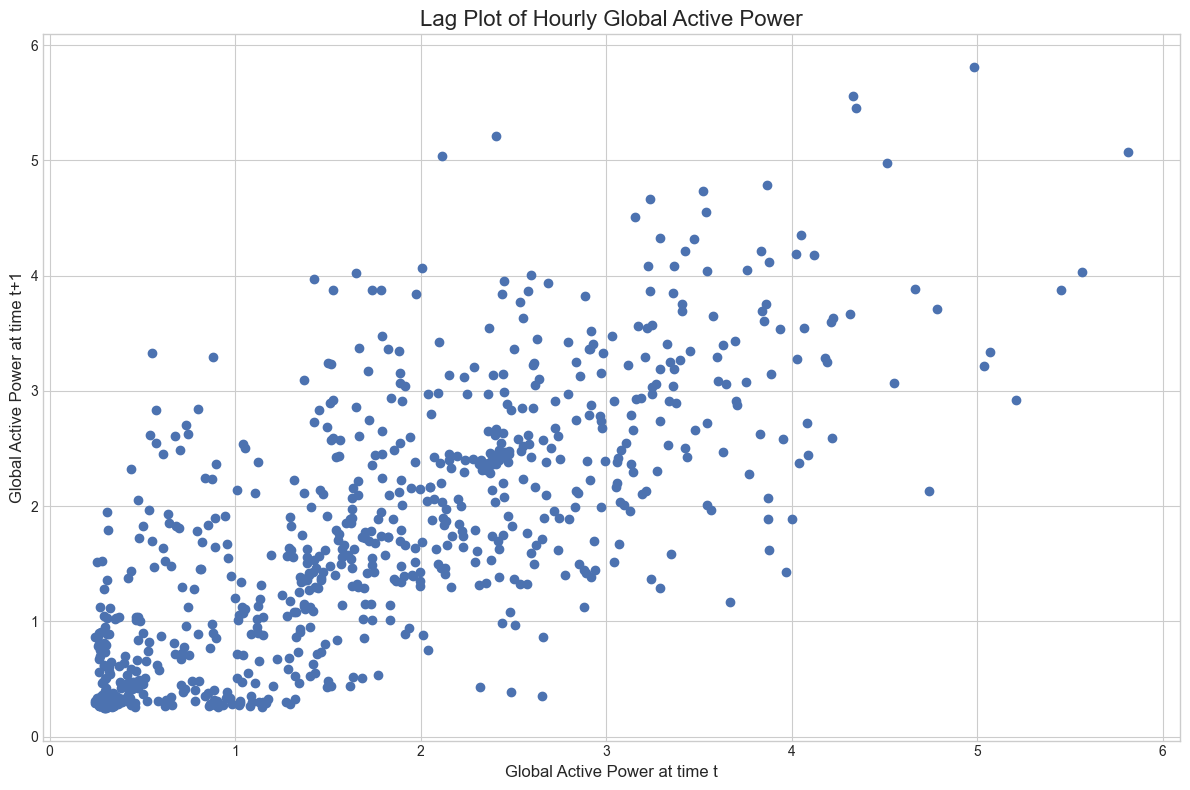

In [48]:
# 13. Lag plots to check for autocorrelation
# Set Timestamp as index
df_sample = df_sample.set_index('Timestamp')

# Now resample and plot
plt.figure(figsize=(12, 8))
lag_plot(df_sample['Global_active_power'].resample('1H').mean())
plt.title('Lag Plot of Hourly Global Active Power', fontsize=16)
plt.xlabel('Global Active Power at time t', fontsize=12)
plt.ylabel('Global Active Power at time t+1', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The lag plot shows positive autocorrelation in hourly Global Active Power, with points clustered along a diagonal pattern, indicating that power usage in one hour tends to be similar to the previous hour.

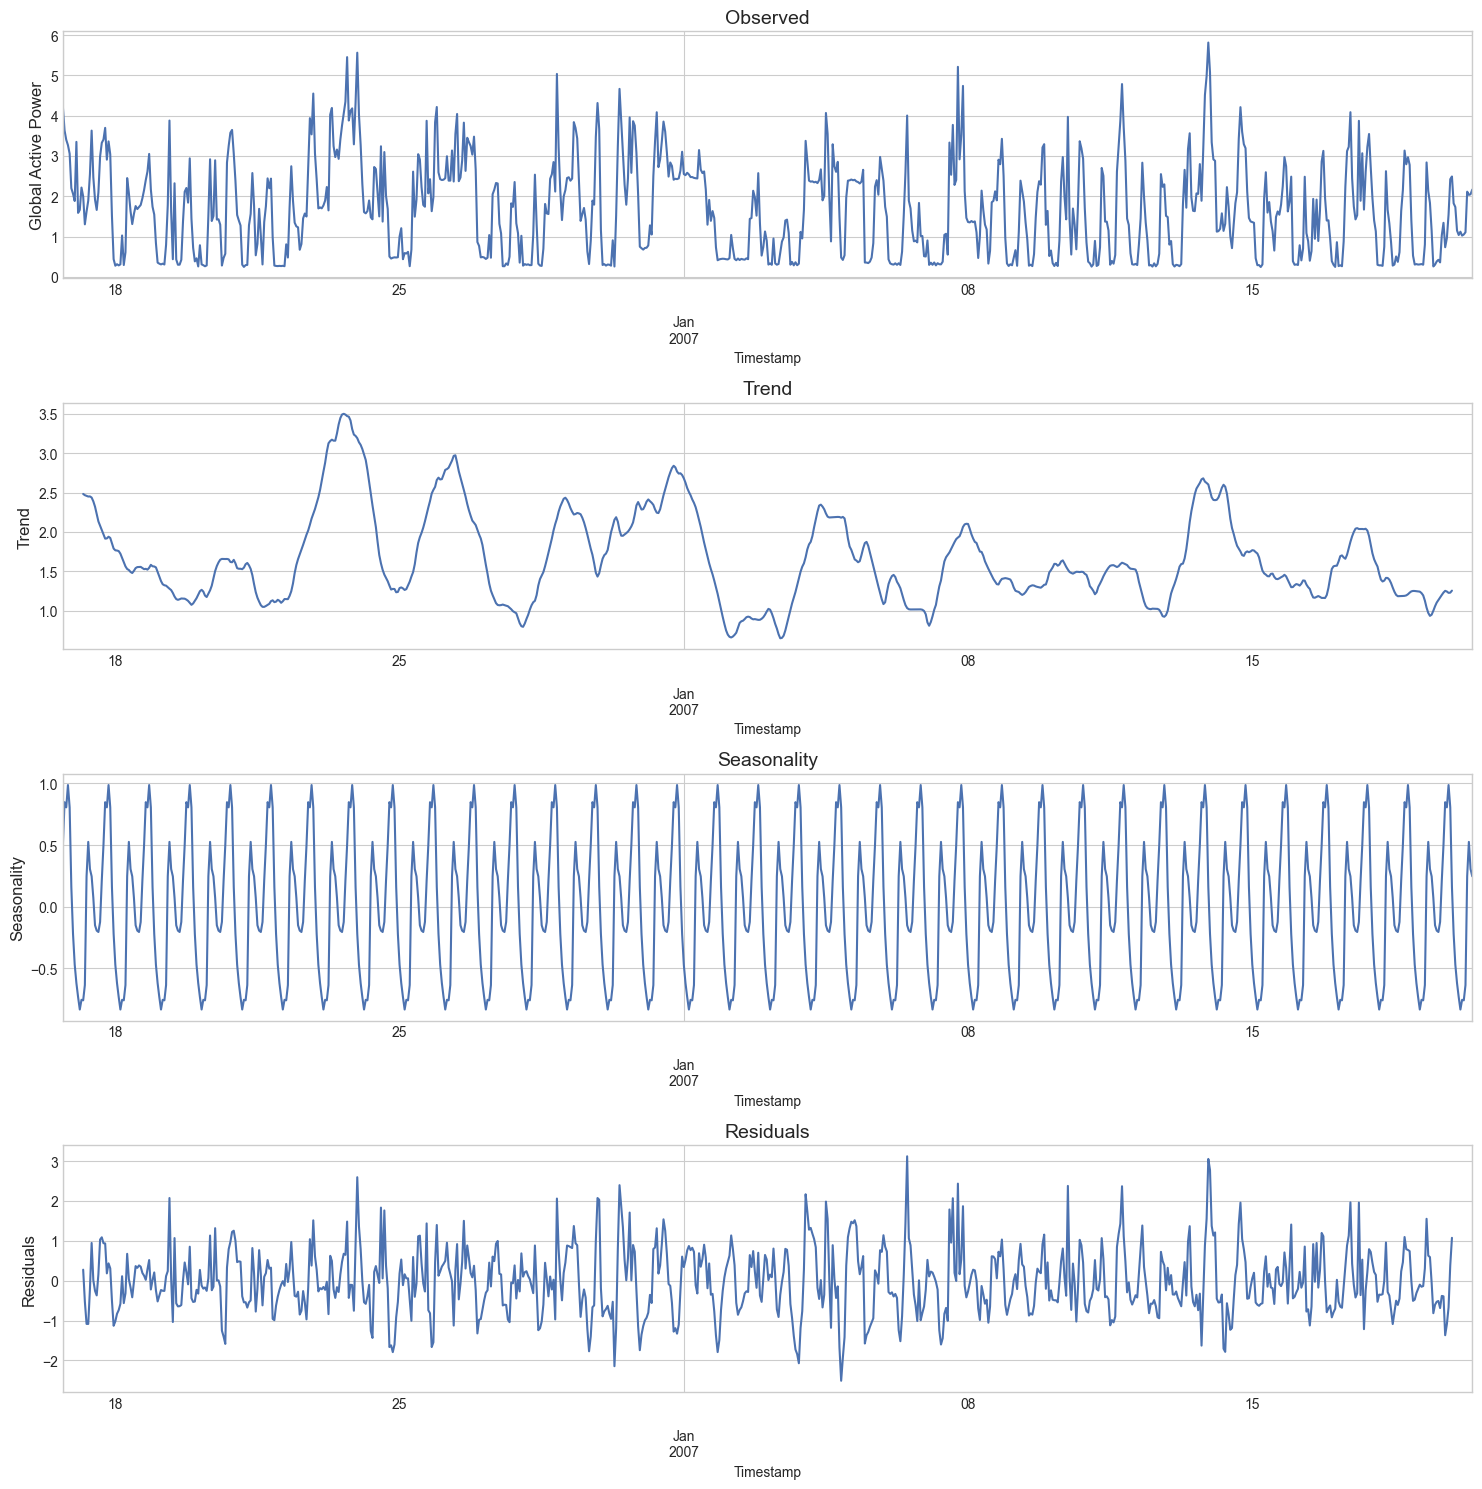

In [51]:
# 14. Decomposition plots
# Resample to hourly for decompositionhourly_active_power = df_sample['Global_active_power'].resample('1H', on='Timestamp').mean()
# Already Timestamp is index
hourly_active_power = df_sample['Global_active_power'].resample('1H').mean()

decomposition = seasonal_decompose(hourly_active_power, model='additive', period=24)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 15))

decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed', fontsize=14)
ax1.set_ylabel('Global Active Power', fontsize=12)

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend', fontsize=14)
ax2.set_ylabel('Trend', fontsize=12)

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality', fontsize=14)
ax3.set_ylabel('Seasonality', fontsize=12)

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residuals', fontsize=14)
ax4.set_ylabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

The decomposition plot separates the time series into observed data, trend (showing medium-term fluctuations), clear 24-hour seasonality patterns, and residuals (unexplained variations).

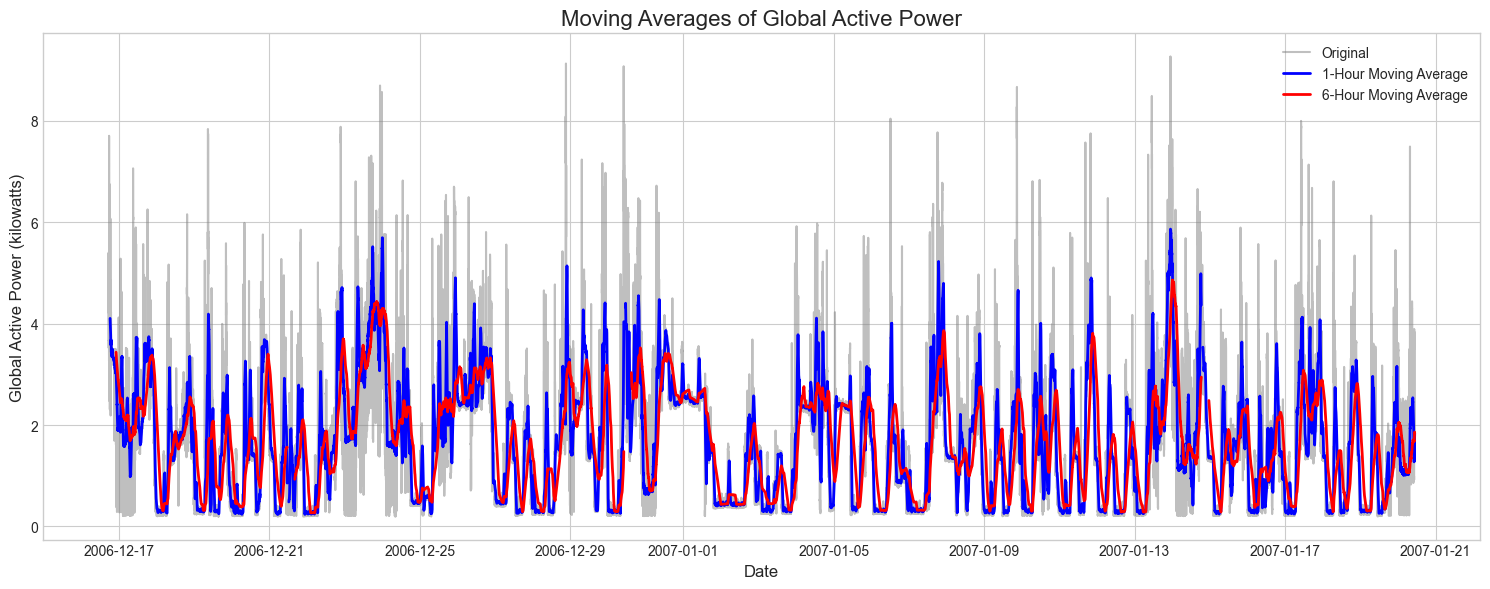

In [54]:
# 15. Moving average plots
plt.figure(figsize=(15, 6))

plt.plot(df_sample.index, df_sample['Global_active_power'], label='Original', color='gray', alpha=0.5)
plt.plot(df_sample.index, df_sample['Global_active_power'].rolling(window=60).mean(), label='1-Hour Moving Average', color='blue', linewidth=2)
plt.plot(df_sample.index, df_sample['Global_active_power'].rolling(window=288).mean(), label='6-Hour Moving Average', color='red', linewidth=2)

plt.title('Moving Averages of Global Active Power', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Moving averages (1-hour in blue, 6-hour in red) smooth out the volatility in Global Active Power, highlighting underlying consumption patterns while filtering out short-term fluctuations.